In [1]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image

from ip_adapter import IPAdapterPlusXL

In [2]:
base_model_path = "SG161222/RealVisXL_V1.0"
image_encoder_path = "models/image_encoder"
ip_ckpt = "sdxl_models/ip-adapter-plus_sdxl_vit-h.bin"
device = "cuda"

In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
# load SDXL pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    add_watermarker=False,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
# load ip-adapter
ip_model = IPAdapterPlusXL(pipe, image_encoder_path, ip_ckpt, device, num_tokens=16)

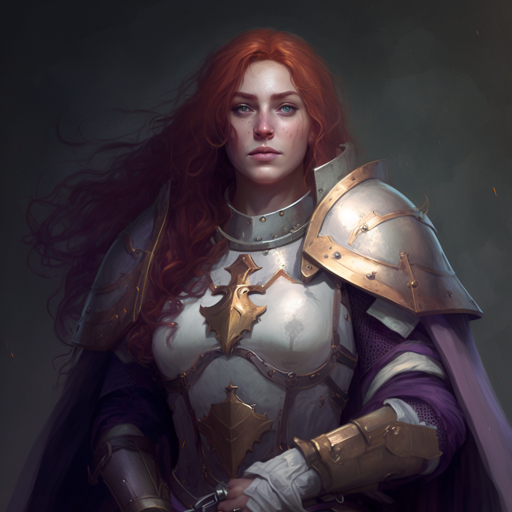

In [6]:
# read image prompt
image = Image.open("assets/images/woman.png")
image.resize((512, 512))

  0%|          | 0/30 [00:00<?, ?it/s]

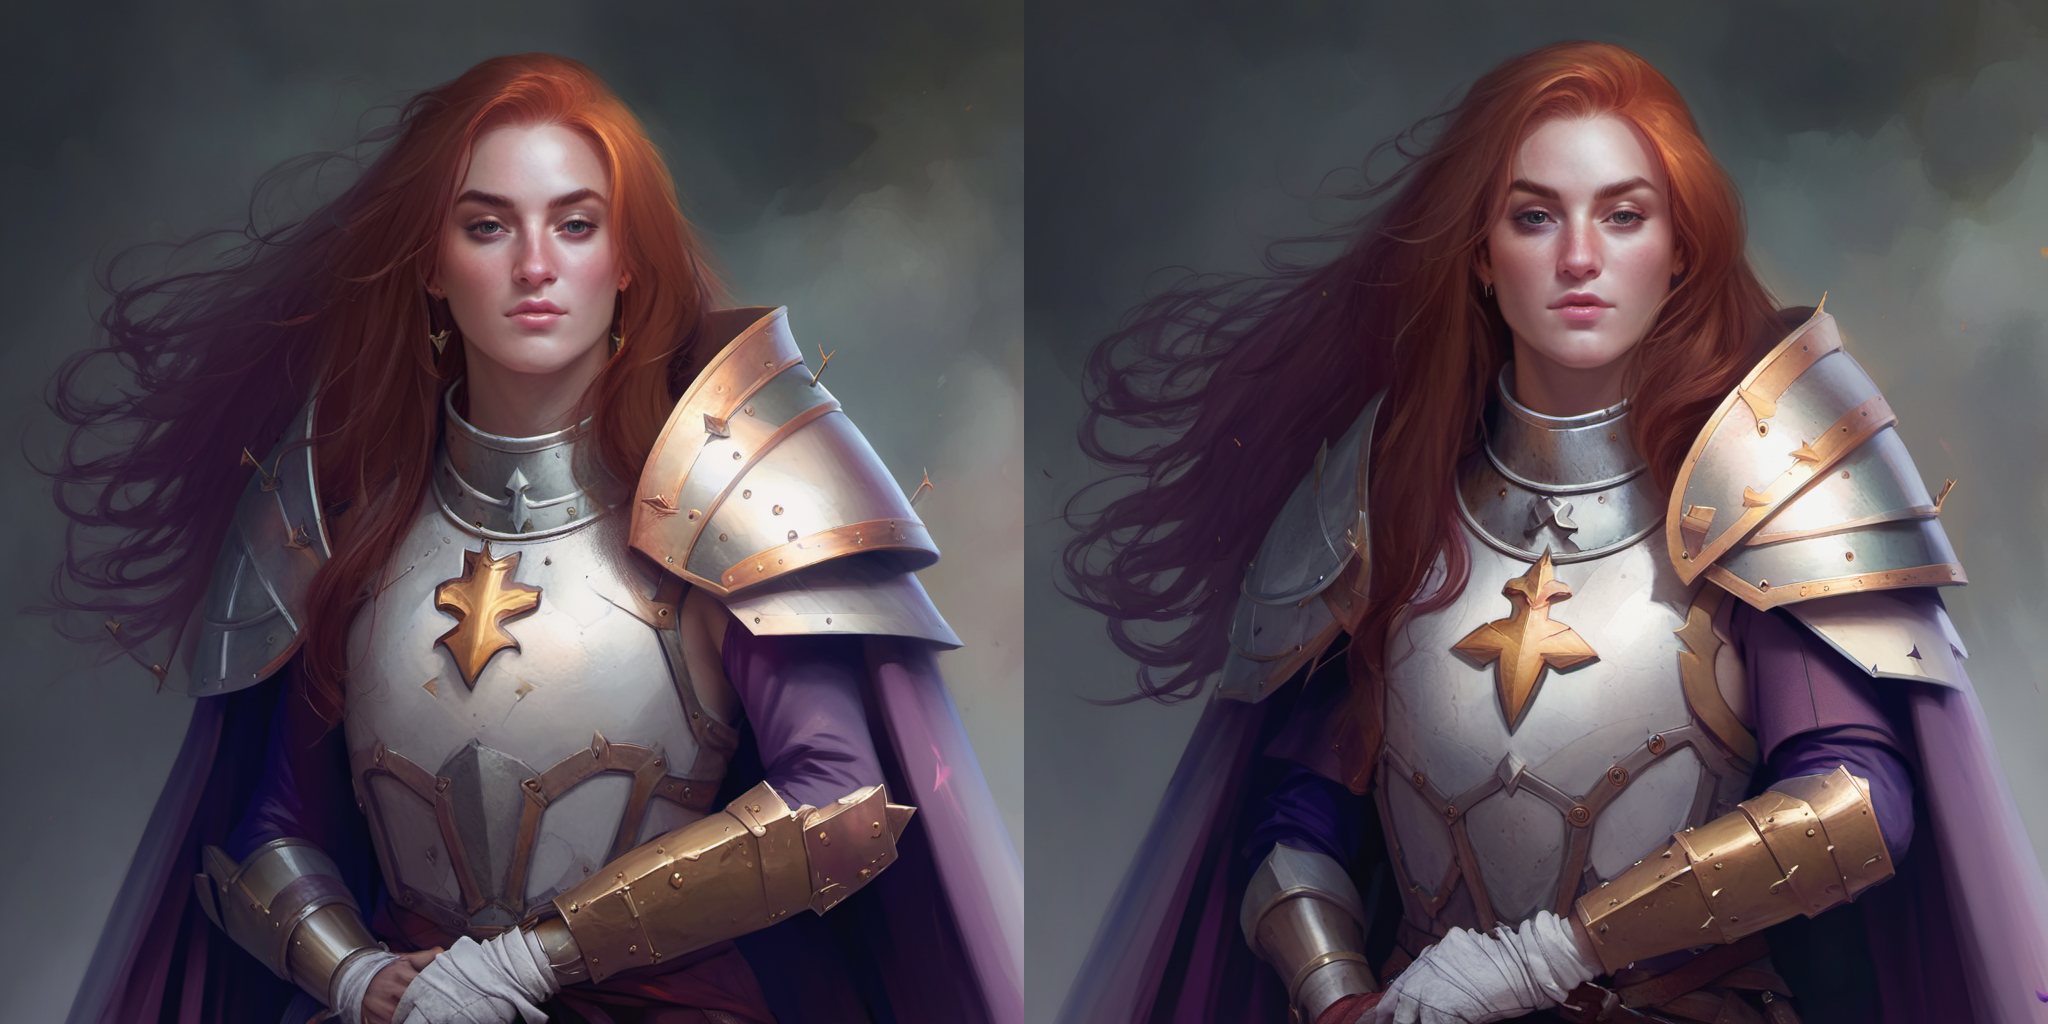

In [7]:
# generate image variations with only image prompt
num_samples = 2
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=42)
grid = image_grid(images, 1, num_samples)
grid

  0%|          | 0/30 [00:00<?, ?it/s]

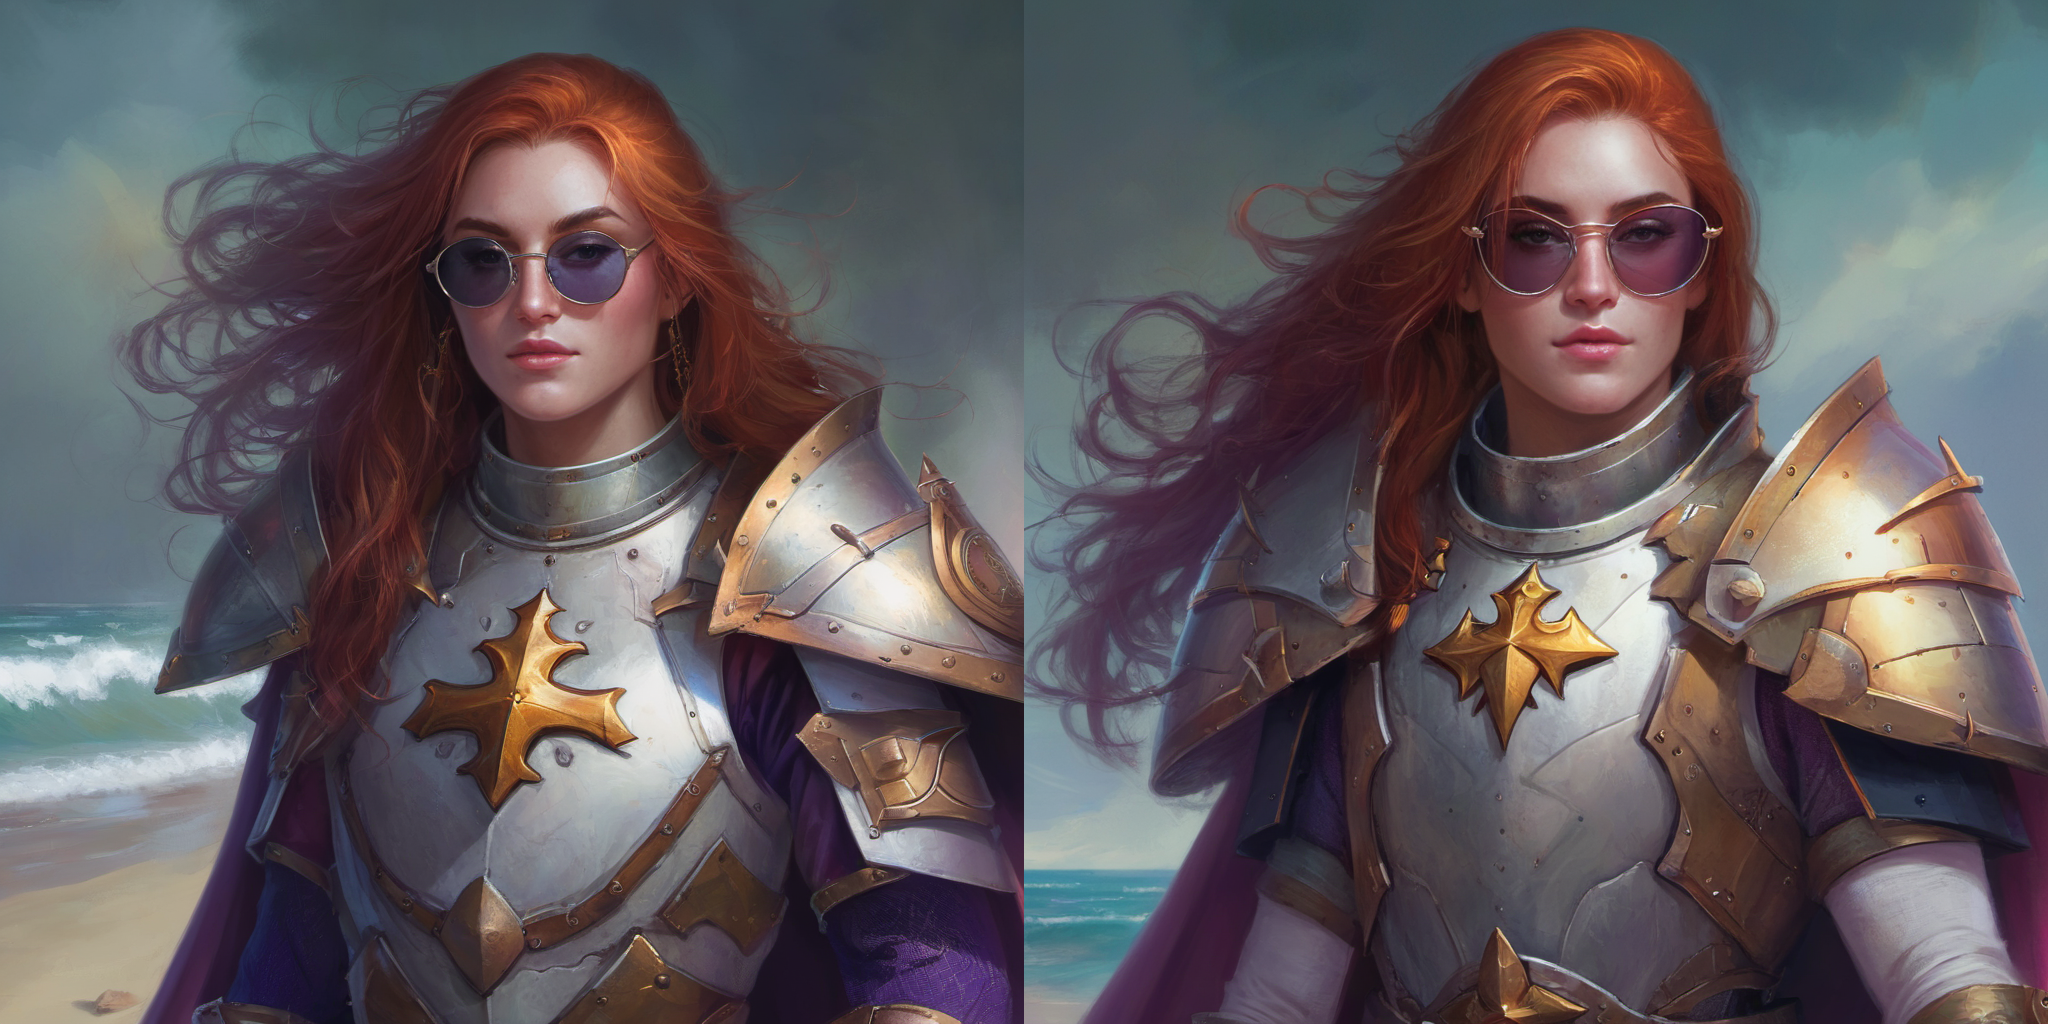

In [8]:
# multimodal prompts
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=42,
        prompt="best quality, high quality, wearing sunglasses on the beach", scale=0.5)
grid = image_grid(images, 1, num_samples)
grid